# Scatter Plots of Samples

In [1]:
from copy import deepcopy
from numpy import ceil, linspace, meshgrid, zeros, array, arange
from mpl_toolkits.mplot3d.axes3d import Axes3D

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


from qmcpy import *

In [2]:
n = 128

## IID Samples
Visualize IID standard uniform and standard normal sampling points

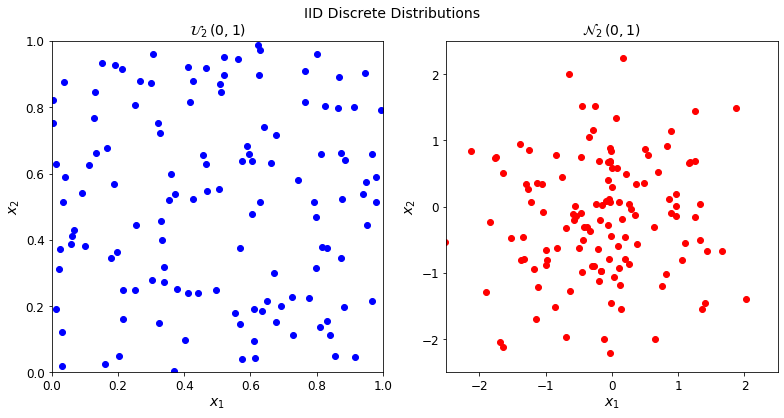

In [3]:
discrete_distribs = [IIDStdUniform(rng_seed=7), IIDStdGaussian(rng_seed=7)]
dd_names = ["$\\mathcal{U}_2\\,(0,1)$", "$\\mathcal{N}_2\\,(0,1)$"]
colors = ["b", "r"]
lims = [[0, 1], [-2.5, 2.5]]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
for i, (dd_obj, color, lim, dd_name) in enumerate(zip(discrete_distribs, colors, lims, dd_names)):
    samples = dd_obj.gen_dd_samples(1, n, 2).squeeze()
    ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")
    ax[i].set_xlim(lim)
    ax[i].set_ylim(lim)
    ax[i].set_aspect("equal")
    ax[i].set_title(dd_name)
fig.suptitle("IID Discrete Distributions")
plt.tight_layout()
fig.savefig("../outputs/sample_scatters/iid_dd.png", dpi=200)

## LDS Samples
Visualize shifted lattice and scrambled Sobol sampling points

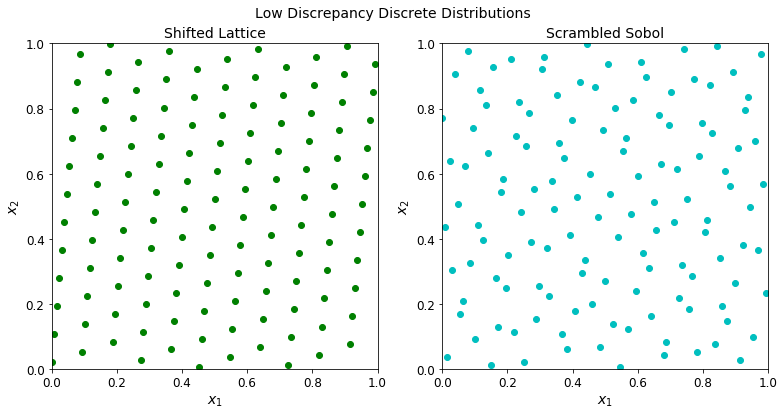

In [4]:
discrete_distribs = [Lattice(rng_seed=7), Sobol(rng_seed=7)]
dd_names = ["Shifted Lattice", "Scrambled Sobol"]
colors = ["g", "c"]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
for i, (dd_obj, color, dd_name) in \
        enumerate(zip(discrete_distribs, colors, dd_names)):
    samples = dd_obj.gen_dd_samples(1, n, 2).squeeze()
    ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")
    ax[i].set_xlim([0, 1])
    ax[i].set_ylim([0, 1])
    ax[i].set_aspect("equal")
    ax[i].set_title(dd_name)
fig.suptitle("Low Discrepancy Discrete Distributions")
plt.tight_layout()
fig.savefig("../outputs/sample_scatters/lds_dd.png", dpi=200)

## Transform to the True Distribution
Transform our Discrete Distribution samples to mimic various True Distributions

In [5]:
def plot_tm_tranformed(tm_name,measure,color,lim):
    discrete_distribs = [IIDStdUniform(rng_seed=7), IIDStdGaussian(rng_seed=7),
                         Lattice(rng_seed=7), Sobol(rng_seed=7)]
    dd_names = ["IID $\\mathcal{U}_2\\,(0,1)$", "IID $\\mathcal{N}_2\\,(0,1)$",
                "Shifted Lattice", "Scrambled Sobol"]
    fig, ax = plt.subplots(nrows=1, ncols=len(discrete_distribs), figsize=(13, 4))
    for k, (distrib, dd_name) in \
            enumerate(zip(discrete_distribs, dd_names)):
        tm_obj = deepcopy(measure)
        dd_obj = deepcopy(distrib)
        tm_obj.set_tm_gen(dd_obj)
        tm_samples = tm_obj[0].gen_tm_samples(1, n).squeeze()
        ax[k].scatter(tm_samples[:, 0], tm_samples[:, 1], color=color)
        ax[k].set_xlabel("$x_1$")
        ax[k].set_ylabel("$x_2$")
        ax[k].set_xlim(lim)
        ax[k].set_ylim(lim)
        ax[k].set_aspect("equal")
        ax[k].set_title(dd_name)
    fig.suptitle("Transformed to %s from..." % tm_name)
    plt.tight_layout()
    prefix = type(measure).__name__
    fig.savefig("../outputs/sample_scatters/%s_tm_transform.png" % prefix, dpi=200)

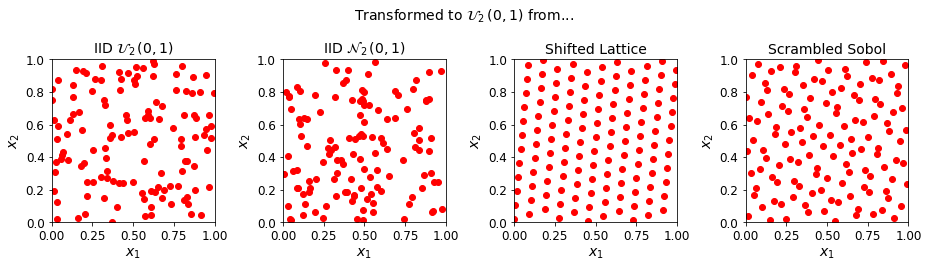

In [6]:
plot_tm_tranformed("$\\mathcal{U}_2\\,(0,1)$",Uniform(2),"r",[0, 1])

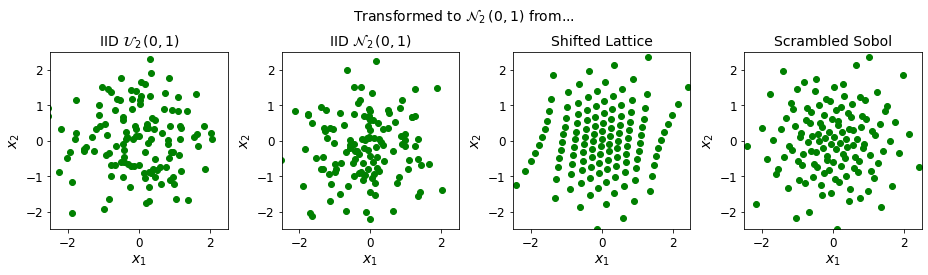

In [7]:
plot_tm_tranformed("$\\mathcal{N}_2\\,(0,1)$",Gaussian(2),"g",[-2.5, 2.5])

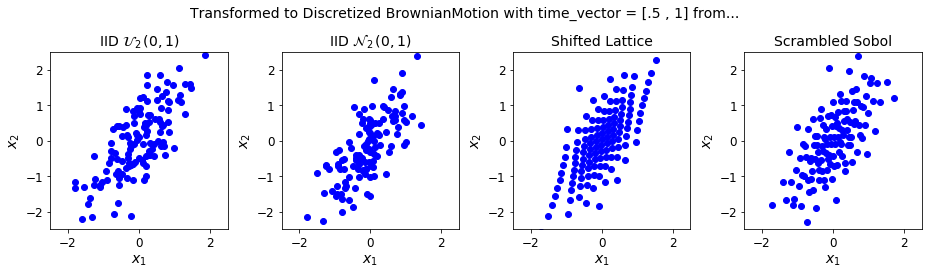

In [8]:
tm_obj = BrownianMotion(dimension=2, time_vector= [arange(1 / 2, 3 / 2, 1 / 2)])
plot_tm_tranformed("Discretized BrownianMotion with time_vector = [.5 , 1]",tm_obj,"b",[-2.5, 2.5])

## Shift and Stretch the True Distribution
Transform Sobo sequences to mimic non-standard Uniform and Gaussian measures

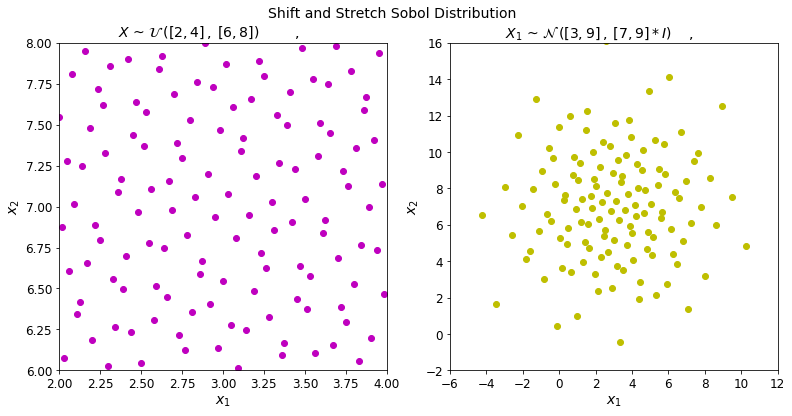

In [9]:
u1_a, u1_b = 2, 4
u2_a, u2_b = 6, 8
g1_mu, g1_var = 3, 9
g2_mu, g2_var = 7, 9
distrib = Sobol(rng_seed=7)
u_obj = Uniform(dimension=array([2]),
                lower_bound=[array([u1_a, u2_a])],
                upper_bound=[array([u1_b, u2_b])])
n_obj = Gaussian(dimension=array([2]),
                 mean=[array([g1_mu, g2_mu])],
                 variance=[array([g1_var, g2_var])])
colors = ["m", "y"]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
for i, (measure, color) in enumerate(zip([u_obj, n_obj], colors)):
    tm_obj = deepcopy(measure)
    dd_obj = deepcopy(distrib)
    tm_obj.set_tm_gen(dd_obj)
    tm_samples = tm_obj[0].gen_tm_samples(1, n).squeeze()
    ax[i].scatter(tm_samples[:, 0], tm_samples[:, 1], color=color)
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")
    ax[i].set_aspect("equal")
ax[0].set_title("$X$ ~ $\\mathcal{U}\\,([%d,%d] \:,\: [%d,%d])$\t,\t" % (u1_a, u1_b,u2_a, u2_b))
ax[1].set_title("$X_1$ ~ $\\mathcal{N}\\,([%d,%d] \:,\: [%d,%d]*I)$\t,\t" % (g1_mu, g1_var,g2_mu, g2_var))
ax[0].set_xlim([u1_a, u1_b])
ax[0].set_ylim([u2_a, u2_b])
spread_g1 = ceil(3 * g1_var**.5)
spread_g2 = ceil(3 * g2_var**.5)
ax[1].set_xlim([g1_mu - spread_g1, g1_mu + spread_g1])
ax[1].set_ylim([g2_mu - spread_g2, g2_mu + spread_g2])
fig.suptitle("Shift and Stretch Sobol Distribution")
plt.tight_layout()
fig.savefig("../outputs/sample_scatters/shift_stretch_tm.png", dpi=200)

## Plots samples on a 2D Keister function

In [10]:
# Generate constants for 3d plot in following cell
abs_tol = .5
dim = 2
integrand = Keister(dim)
distrib = IIDStdGaussian(rng_seed=7)
measure = Gaussian(dimension=dim,variance=1/2)
stopping_criterion = CLT(distrib,measure, abs_tol=abs_tol, n_init=16, n_max=1e10)
sol, data = integrate(integrand, measure, distrib, stopping_criterion)
print(data)

Solution: 2.0554         
Keister (Integrand Object)
IIDStdGaussian (Discrete Distribution Object)
	mimics          StdGaussian
Gaussian (True Measure Object)
	dimension       2
	mu              0
	sigma           0.707
CLT (Stopping Criterion Object)
	abs_tol         0.500
	rel_tol         0
	n_max           10000000000
	inflate         1.200
	alpha           0.010
MeanVarData (AccumData Object)
	n               65
	n_total         81
	confid_int      [ 1.646  2.464]
	time_total      0.002



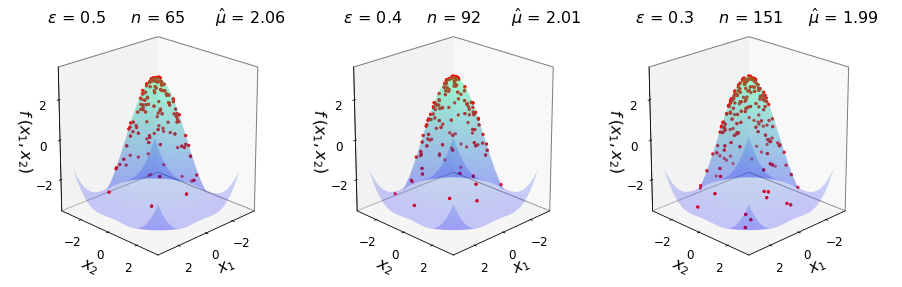

In [11]:
# Constants based on running the above CLT Example
eps_list = [.5, .4, .3]
n_list = [65, 92, 151]
mu_hat_list = [2.0554, 2.0143, 1.9926]

# qmcpy objects
dim = 2
integrand = Keister(dim)
measure = Gaussian(dim)
distrib = IIDStdGaussian(rng_seed=7)
measure.transform(integrand, distrib)

# Function Points
nx, ny = (100, 100)
points_fun = zeros((nx * ny, 3))
x = linspace(-3, 3, nx)
y = linspace(-3, 3, ny)
x_2d, y_2d = meshgrid(x, y)
points_fun[:, 0] = x_2d.flatten()
points_fun[:, 1] = y_2d.flatten()
points_fun[:, 2] = integrand[0].f(points_fun[:, :2])
x_surf = points_fun[:, 0].reshape((nx, ny))
y_surf = points_fun[:, 1].reshape((nx, ny))
z_surf = points_fun[:, 2].reshape((nx, ny))

# 3D Plot
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131, projection="3d")
ax2 = fig.add_subplot(132, projection="3d")
ax3 = fig.add_subplot(133, projection="3d")

for idx, ax in enumerate([ax1, ax2, ax3]):
    # Surface
    ax.plot_surface(x_surf, y_surf, z_surf, cmap="winter", alpha=.2)
    # Scatters
    points = zeros((n, 3))
    points[:, :2] = measure[0].gen_tm_samples(1, n).squeeze()
    points[:, 2] = integrand[0].f(points[:, :2])
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color="r", s=5)
    n = n_list[idx]
    epsilon = eps_list[idx]
    mu = mu_hat_list[idx]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color="r", s=5)
    ax.set_title("\t$\\epsilon$ = %-7.1f $n$ = %-7d $\\hat{\\mu}$ = %-7.2f "
                 % (epsilon, n, mu), fontdict={"fontsize": 16})
    # axis metas
    n *= 2
    ax.grid(False)
    ax.xaxis.pane.set_edgecolor("black")
    ax.yaxis.pane.set_edgecolor("black")
    ax.set_xlabel("$x_1$", fontdict={"fontsize": 16})
    ax.set_ylabel("$x_2$", fontdict={"fontsize": 16})
    ax.set_zlabel("$f\\:(x_1,x_2)$", fontdict={"fontsize": 16})
    ax.view_init(20, 45)
plt.savefig("../outputs/sample_scatters/Three_3d_SurfaceScatters.png", dpi=250, bbox_inches="tight", pad_inches=.15)